#**Change Numerical Data Distributions**



Numerical input variables may have a highly skewed or non-standard distribution. This could be
caused by outliers in the data, multi-modal distributions, highly exponential distributions, and
more. Many machine learning algorithms prefer or perform better when numerical input variables
and even output variables in the case of regression have a standard probability distribution,
such as a Gaussian (normal) or a Uniform distribution.

The quantile transform provides an automatic way to transform a numeric input variable to
have a different data distribution, which in turn, can be used as input to a predictive model.

In this tutorial, you will learn:

* Many machine learning algorithms prefer or perform better when numerical variables have
a Gaussian or standard probability distribution.
* Quantile transforms are techniques for transforming numerical input or output variables
to have a Gaussian or Uniform probability distribution.
* How to use the QuantileTransformer to change the probability distribution of numeric
variables to improve the performance of predictive models.

Adapted from Jason Brownlee. 2020. [Data Preparation for Machine Learning](https://machinelearningmastery.com/data-preparation-for-machine-learning/).

##Quantile Transforms
A quantile transform will map a variable's probability distribution to another probability
distribution. The quantile function ranks or smooths out the relationship between observations and can be
mapped onto other distributions, such as the uniform or normal distribution. The transformation
can be applied to each numeric input variable in the training dataset and then provided as
input to a machine learning model to learn a predictive modeling task. This quantile transform
is available in the scikit-learn Python machine learning library via the **QuantileTransformer**
class.

We first creates a sample of 1,000 random Gaussian values and adds a
skew to the dataset. A histogram is created from the skewed dataset and clearly shows the
distribution pushed to the far left. 



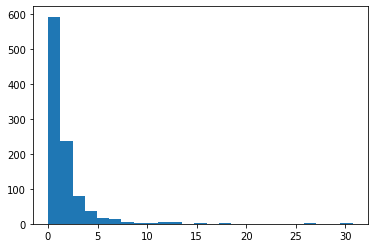

In [1]:
# demonstration of the quantile transform
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)
# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()


Then a QuantileTransformer is used to map the data to a Gaussian distribution and standardize the result, centering the values on the mean value of 0 and a standard deviation of
1.0. A histogram of the transform data is created showing a Gaussian shaped data distribution.

(1000, 1)


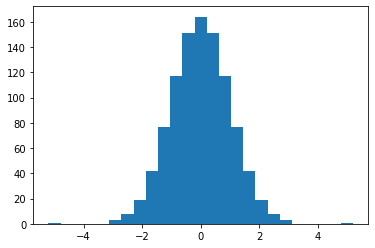

In [2]:
# reshape data to have rows and columns
data = data.reshape((len(data),1))
print(data.shape)
# quantile transform the raw data
# perform a normal quantile transform of the dataset
# 'output_distribution" is the marginal distribution for the transformed data. The choices are
# 'uniform' (default) or 'normal'.
quantile = QuantileTransformer(output_distribution='normal')
data_trans = quantile.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()

#Diabetes Dataset
The dataset classifies patient data as
either an onset of diabetes within five years or not. 
```
Number of Instances: 768
Number of Attributes: 8 plus class 
For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
Missing Attribute Values: Yes
Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")
   Class Value  Number of instances
   0            500
   1            268
```

You can learn more about the dataset here:

* Diabetes Dataset File ([pima-indians-diabetes.csv](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv))
* Diabetes Dataset Details ([pima-indians-diabetes.names](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names))

###Download Diabetes data files

In [3]:
!pip install wget
!python -m wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv" -o pima-indians-diabetes.csv
!python -m wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names" -o pima-indians-diabetes.names

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=165ea0d2849e8fd646ec4e4484674f1a6cc2c9599d991cd7bceccdcaefecb36d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget

Saved under pima-indians-diabetes.csv

Saved under pima-indians-diabetes.names


###Summarizing the variables from the pima-indians-diabetes dataset

In [4]:
# load and summarize the dataset
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
print(dataset.head())
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())


   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1
(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

   

This confirms the 8
input variables, one output variable, and 768 rows of data. 

Finally a histogram is created for each input variable. If we ignore the clutter of the plots and
focus on the histograms themselves, we can see that many variables have a skewed distribution.
The dataset provides a good candidate for using a quantile transform to make the variables
more-Gaussian.

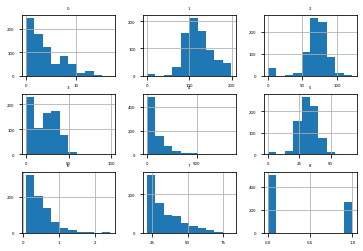

In [5]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

Next, let's first and evaluate a machine learning model on the raw dataset. We will use
a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated
stratified k-fold cross-validation.

In [6]:
# evaluate KNN classifier on the raw dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
# KFold 
#   is a cross-validator that divides the dataset into k folds.
# Stratified
#   is to ensure that each fold of dataset has the same proportion of observations with a given label.
# Repeated 
#   provides a way to improve the estimated performance of a machine learning model. 
# This involves simply repeating the cross-validation procedure multiple times and reporting the mean 
# result across all folds from all runs. This mean result is expected to be a more accurate estimate 
# of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error.
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model using 
# Classifier implementing the k-nearest neighbors vote.
model = KNeighborsClassifier()
# evaluate the model using RepeatedStratifiedKFold cross validator, 
# that repeats Stratified K-Fold n times with different randomization in each
# repetition.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


In this case we can see that the model achieved a mean classification accuracy of about 71.7
percent.

##Normal Quantile Transform
It is often desirable to transform an input variable to have a normal probability distribution to improve the modeling performance. We can apply the Quantile transform using the
QuantileTransformer class and set the output distribution argument to `normal'. We
must also set the n quantiles argument to a value less than the number of observations in the
training dataset, in this case, 100. Once defined, we can call the fit transform() function and
pass it to our dataset to create a quantile transformed version of our dataset.

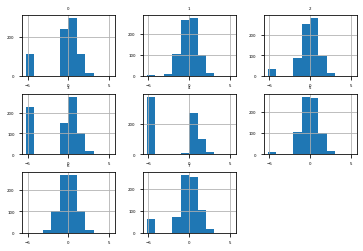

In [7]:
# visualize a normal quantile transform of the dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a normal quantile transform of the dataset
# 'n_quantiles" is the number of quantiles to be computed. It corresponds to the number
# of landmarks used to discretize the cumulative distribution function.
# 'output_distribution" is the marginal distribution for the transformed data. The choices are
# 'uniform' (default) or 'normal'.
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

We can see that the shape of the histograms for each variable looks very Gaussian as compared
to the raw data.

Next, let's evaluate the same KNN model as the previous section, but in this case on a
normal quantile transform of the dataset

In [8]:
# Evaluate KNN with normal quantile transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='normal')
# Classifier implementing the k-nearest neighbors vote.
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.734 (0.044)


we can see that the normal quantile transform results in a lift in
performance from 71.7 percent accuracy without the transform to about 73.4 percent with the
transform.

##Uniform Quantile Transform
Sometimes it can be beneficial to transform a highly exponential or multi-modal distribution to
have a uniform distribution. This is especially useful for data with a large and sparse range of
values, e.g. outliers that are common rather than rare. We can apply the transform by defining
a QuantileTransformer class and setting the output distribution argument to `uniform'
(the default).

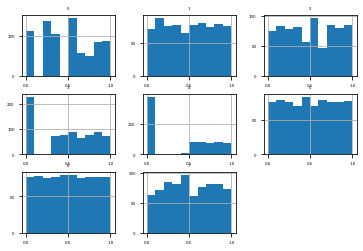

In [9]:
# visualize a uniform quantile transform of the dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a uniform quantile transform of the dataset
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

We can see that the shape of the histograms for each variable looks very uniform compared to
the raw data.

Next, let's evaluate the same KNN model as the previous section, but in this case on a
uniform quantile transform of the raw dataset.

In [10]:
# evaluate KNN classifer on the dataset with uniform quantile transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline
# load dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = QuantileTransformer(n_quantiles=100, output_distribution='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.741 (0.050)


we can see that the uniform transform results in a lift in performance
from 71.7 percent accuracy without the transform to about 73.4 percent with the normal transform, and achieved a score of 74.1 percent.

We chose the number of quantiles as an arbitrary number, in this case, 100. This hyperparameter can be tuned to explore the effect of the resolution of the transform on the resulting
skill of the model. The example below performs this experiment and plots the mean accuracy
for different n quantiles values from 1 to 99.

In [11]:
# explore number of quantiles on classification accuracy
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset(filename):
  # load dataset
  dataset = read_csv(filename, header=None)
  data = dataset.values
  # separate into input and output columns
  X, y = data[:, :-1], data[:, -1]
  # ensure inputs are floats and output is an integer label
  X = X.astype('float32')
  y = LabelEncoder().fit_transform(y.astype('str'))
  return X, y

# get a list of models to evaluate
def get_models():
  models = dict()
  for i in range(1,100):
    # define the pipeline
    trans = QuantileTransformer(n_quantiles=i, output_distribution='uniform')
    model = KNeighborsClassifier()
    # The purpose of the pipeline is to assemble several steps that can be
    # cross-validated together while setting different parameters.
    models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
  return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
  # Repeats Stratified K-Fold n times with different randomization in each repetition.
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  # Evaluate a score by cross-validation
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  return scores


# define dataset
X, y = get_dataset('pima-indians-diabetes.csv')
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results = list()
for name, model in models.items():
  scores = evaluate_model(model, X, y)
  results.append(mean(scores))
  print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>1 0.430 (0.134)
>2 0.738 (0.053)
>3 0.732 (0.056)
>4 0.733 (0.057)
>5 0.742 (0.054)
>6 0.738 (0.050)
>7 0.740 (0.052)
>8 0.739 (0.056)
>9 0.747 (0.053)
>10 0.742 (0.051)
>11 0.731 (0.058)
>12 0.735 (0.049)
>13 0.740 (0.052)
>14 0.735 (0.048)
>15 0.737 (0.055)
>16 0.734 (0.051)
>17 0.740 (0.051)
>18 0.738 (0.049)
>19 0.740 (0.051)
>20 0.739 (0.049)
>21 0.737 (0.047)
>22 0.741 (0.049)
>23 0.737 (0.048)
>24 0.737 (0.048)
>25 0.737 (0.049)
>26 0.739 (0.048)
>27 0.738 (0.047)
>28 0.740 (0.050)
>29 0.743 (0.050)
>30 0.739 (0.045)
>31 0.736 (0.052)
>32 0.738 (0.048)
>33 0.736 (0.045)
>34 0.737 (0.049)
>35 0.741 (0.044)
>36 0.739 (0.049)
>37 0.736 (0.053)
>38 0.737 (0.046)
>39 0.741 (0.053)
>40 0.736 (0.048)
>41 0.736 (0.047)
>42 0.739 (0.052)
>43 0.737 (0.052)
>44 0.740 (0.050)
>45 0.737 (0.050)
>46 0.739 (0.051)
>47 0.739 (0.044)
>48 0.737 (0.052)
>49 0.740 (0.048)
>50 0.737 (0.049)
>51 0.740 (0.049)
>52 0.737 (0.046)
>53 0.739 (0.047)
>54 0.738 (0.048)
>55 0.740 (0.050)
>56 0.739 (0.051)
>

In this case, we can see that surprisingly smaller values resulted in better accuracy, with
values such as 9 achieving an accuracy of about 74.7 percent.

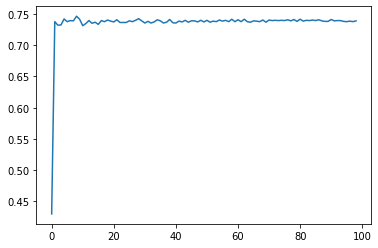

In [12]:
# plot model performance for comparison
pyplot.plot(results)
pyplot.show()

A line plot is created showing the number of quantiles used in the transform versus the
classification accuracy of the resulting model. We can see a bump with values less than 10 and
drop and 
at performance after that. The results highlight that there is likely some benefit in
exploring different distributions and number of quantiles to see if better performance can be
achieved.